# Data Pre-processing



### Importar bibliotecas e arquivos

In [0]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from google.colab import files
import io
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

In [3]:
uploaded = files.upload()

Saving Dataset PS.csv to Dataset PS.csv
Saving df_lemma.csv to df_lemma.csv
Saving df_news.csv to df_news.csv
Saving df_news2.csv to df_news2.csv
Saving df_news3.csv to df_news3.csv
Saving df_no_source.csv to df_no_source.csv


### Análise do dataset

In [0]:
df = pd.read_csv(io.BytesIO(uploaded['Dataset PS.csv']))

In [27]:
df.head(5)

,title,summary,source,source.1,topic,business_line
0,Embraer's E190-E2 Program Development Named 20...,"Project Management Institute (PMI), the world’...",Business Wire,Business Wire,Self-awareness,Commercial
1,Jet Aviation Announces Opening of New Teterbor...,Jet Aviation announces the opening of its new ...,AviationPros.com,AviationPros.com,Expansion,Executive
2,GMF Solidifies Its Airframe Capabilities With ...,"GMF AeroAsia is adding hangars, subsidiaries a...",MRO Network,MRO Network,New facility,Commercial
3,United Technologies nets $325.2M contract for ...,The Pratt & Whitney division of United Technol...,Breitbart,Breitbart,Contract,Military
4,"Boeing wants to double in size, and Australia ...",American aircraft manufacturer Boeing expects ...,The Australian Financial Review,The Australian Financial Review,Expansion,Commercial


In [0]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [26]:
df.head(5)

,title,summary,source,source.1,topic,business_line
0,Embraer's E190-E2 Program Development Named 20...,"Project Management Institute (PMI), the world’...",Business Wire,Business Wire,Self-awareness,Commercial
1,Jet Aviation Announces Opening of New Teterbor...,Jet Aviation announces the opening of its new ...,AviationPros.com,AviationPros.com,Expansion,Executive
2,GMF Solidifies Its Airframe Capabilities With ...,"GMF AeroAsia is adding hangars, subsidiaries a...",MRO Network,MRO Network,New facility,Commercial
3,United Technologies nets $325.2M contract for ...,The Pratt & Whitney division of United Technol...,Breitbart,Breitbart,Contract,Military
4,"Boeing wants to double in size, and Australia ...",American aircraft manufacturer Boeing expects ...,The Australian Financial Review,The Australian Financial Review,Expansion,Commercial


In [16]:
df.shape

(748, 6)

In [18]:
df.topic.unique()

array(['Self-awareness', 'Expansion', 'New facility', 'Contract',
       'Investment', 'Aircraft sales', 'New technology', 'New service',
       'Deal', 'Market', 'PlayerProfile', 'New aircraft', 'Cybersecurity',
       'Product', 'Startup', 'Airworthiness Directive',
       'Enviromental issues', 'Gov. Contract.', 'Regulation', 'VTOL',
       'Reliability issues', 'Fueling', 'Team', 'Service Quality', 'R&D',
       'M&A', 'Financial', 'Geopolitc environment', 'Legislation', 'UAV',
       'Other serving Embraer airplanes', 'AI', 'Trade deal', nan,
       'Tech. Info', 'Training', 'Geopolitc enviroment',
       'Competitor Profile', 'Events', 'New Facility', 'STC',
       'New Aircraft', 'PR', '-'], dtype=object)

In [19]:
df.topic.nunique()

43

In [10]:
df.business_line.unique()

array(['Commercial', 'Executive', 'Military', 'Generic', 'Other',
       'Comercial', nan, 'Agriculture'], dtype=object)

In [15]:
df.source.nunique()

316

In [52]:
df['source.1'].nunique()

226

In [9]:
temp1 = df.groupby('business_line').size()
print(temp1)

business_line
Agriculture      1
Comercial       71
Commercial     175
Executive       71
Generic        265
Military       134
Other           28
dtype: int64


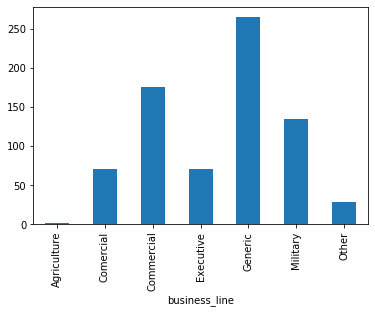

In [12]:
temp1.plot(kind = "bar")

Podemos ver que há uma business_line chamada "commercial" e outra "comercial", duas classificações que deveriam ser a mesma.
Consertaremos este problema reescrevendo os valores "comercial" como "commercial".

In [0]:
df['business_line'] = np.where(df['business_line'] == 'Comercial', 'Commercial', df['business_line'])

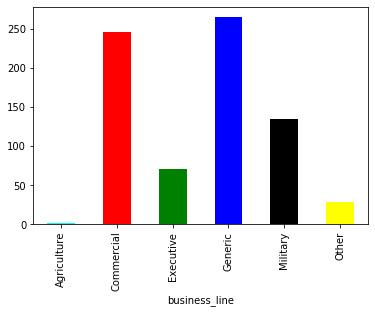

In [10]:
temp11 = df.groupby('business_line').size()
temp11.plot(kind = "bar", color=['cyan', 'red', 'green', 'blue', 'black', 'yellow'])

In [0]:
df3['business_line'] = np.where(df3['business_line'] == 'Generic', 'Other', df3['business_line'])
df3['business_line'] = np.where(df3['business_line'] == 'Agriculture', 'Other', df3['business_line'])

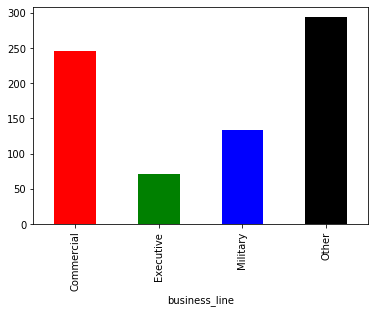

In [24]:
temp12 = df3.groupby('business_line').size()
temp12.plot(kind = "bar", color=['red', 'green', 'blue', 'black'])

### Transformar os tópicos com menos de 20 notícias em um novo tópico correspondente à sua business line

In [0]:
df3 = pd.read_csv(io.BytesIO(uploaded['df_lemma.csv']))
df3['business_line'] = np.where(df3['business_line'] == 'Generic', 'Other', df3['business_line'])
df3['business_line'] = np.where(df3['business_line'] == 'Agriculture', 'Other', df3['business_line'])

In [76]:
df3.head(5)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,news,source,topic,business_line
0,0,0,0,embraer e190-e2 program development name 2019 ...,Business Wire,Self-awareness,Commercial
1,1,1,1,jet aviation announce open new teterboro hang...,AviationPros.com,Expansion,Executive
2,2,2,2,gmf solidify airframe capabilities new strat...,MRO Network,New facility,Commercial
3,3,3,3,unite technologies net $3252m contract f-35 d...,Breitbart,Contract,Military
4,4,4,4,boeing want double size australia central ...,The Australian Financial Review,Expansion,Commercial


In [0]:
a = 0
for j in df3['topic']:
  if j == "Team" or j ==  "Geopolitc environment" or j ==  "Product" or j ==  "Investment" or j ==  "VTOL" or j ==  "Financial" or j ==  "Service Quality" or j ==  "Tech. Info" or j ==  "Reliability issues" or j ==  "Startup" or j ==  "R&D" or j ==  "Enviromental issues" or j ==  "Legislation" or j ==  "Training" or j ==  "Cybersecurity" or j ==  "UAV" or j ==  "Fueling" or j ==  "AI" or j ==  "Other serving Embraer airplanes" or j ==  "PlayerProfile" or j ==  "Events" or j ==  "Airworthiness Directive" or j ==  "Trade deal" or j ==  "PR" or j ==  "New Facility" or j ==  "STC" or j ==  "New Aircraft" or j ==  "Geopolitc enviroment" or j ==  "Competitor Profile":
    df3.iloc[a,5] = df3.iloc[a,6]
    a = a+1
  else:
    a = a+1

In [80]:
df3.head(10)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,news,source,topic,business_line
0,0,0,0,embraer e190-e2 program development name 2019 ...,Business Wire,Self-awareness,Commercial
1,1,1,1,jet aviation announce open new teterboro hang...,AviationPros.com,Expansion,Executive
2,2,2,2,gmf solidify airframe capabilities new strat...,MRO Network,New facility,Commercial
3,3,3,3,unite technologies net $3252m contract f-35 d...,Breitbart,Contract,Military
4,4,4,4,boeing want double size australia central ...,The Australian Financial Review,Expansion,Commercial
5,5,5,5,airbus invest $5 billion turkey 2030 turkis...,Aeronautics Online,Other,Other
6,6,6,6,airbus sell 41 jet september target record fo...,Reuters,Aircraft sales,Commercial
7,7,7,7,aar test drone aircraft inspection miami aar...,MRO Network,New technology,Other
8,8,8,8,airbus plan venture help airlines hedge reve...,Bloomberg,New service,Commercial
9,9,9,9,airx world largest lineage operator airx u...,Corporate Jet Investor,Self-awareness,Commercial


In [81]:
temp31 = df3.groupby('topic').count().sort_values(['business_line'],ascending=False)
print(temp31['business_line'])

topic
Other             112
Deal               72
Commercial         62
Self-awareness     57
New service        53
New technology     49
New aircraft       40
Gov. Contract.     40
Expansion          37
Market             35
New facility       32
Regulation         32
Aircraft sales     31
Contract           31
Military           28
M&A                27
Executive           7
-                   0
Name: business_line, dtype: int64


### Informações sobre "topic" e "source"

In [0]:
df = pd.read_csv(io.BytesIO(uploaded['df_news2.csv']))

In [43]:
temp2 = df.groupby('source').count().sort_values(['business_line'],ascending=False)
temp2.head(20)

,title,summary,source.1,topic,business_line
source,,,,,
Aviation International News,66,66,38,66,66
MRO Network,58,58,40,58,58
AviationPros.com,48,48,32,48,48
Reuters,26,26,15,26,26
Simple Flying,19,19,13,19,19
Aeroflap,14,14,8,14,14
Aviation Week,12,12,3,12,12
Aviation Today,11,11,8,11,11
Le Journal de l'Aviation,10,10,3,10,10


In [51]:
x = 0
y = 0
for i in df['source.1']:
  if i == df['source'][y]:
    x = x+1
    y=y+1
  else:
    y=y+1
print(x)

476


476 vezes source e source.1 são iguais.

In [59]:
z = 0
for i in df['source.1']:
  if type(i) == str:
    z = z+1
  else:
    z = z
print(z)

476


A coluna source.1 tem apenas 476 valores e porntanto todas as linhas que tem algum valor em source.1 tem o mesmo valor também em source.

Nesse caso, iremos utilizar apenas a coluna source, pois a coluna source.1 não irá agregar mais nenhuma informação no nosso conjunto de dados. 

In [61]:
temp3 = df.groupby('topic').count().sort_values(['business_line'],ascending=False)
print(temp3['business_line'])

topic
Deal                               72
Self-awareness                     57
New service                        53
New technology                     49
New aircraft                       40
Gov. Contract.                     40
Expansion                          37
Market                             35
Regulation                         32
New facility                       32
Aircraft sales                     31
Contract                           31
M&A                                27
Team                               19
Geopolitc environment              17
Product                            16
Investment                         15
VTOL                               13
Financial                          12
Service Quality                    11
Tech. Info                         11
Reliability issues                 11
Startup                            10
R&D                                10
Enviromental issues                 8
Legislation                         7
Traini

# Data Visualization





## Número de caracteres em cada notícia

No sumário

In [0]:
df['Summary_length'] = df['summary'].str.len()

Text(0.5, 1.0, 'Summary length distribution')

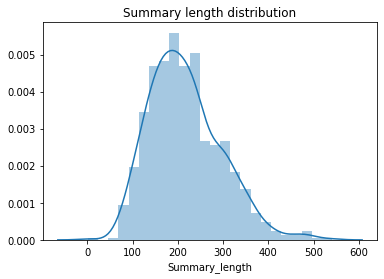

In [12]:
sns.distplot(df['Summary_length']).set_title('Summary length distribution')

No título

In [0]:
df['Title_length'] = df['title'].str.len()

Text(0.5, 1.0, 'Title length distribution')

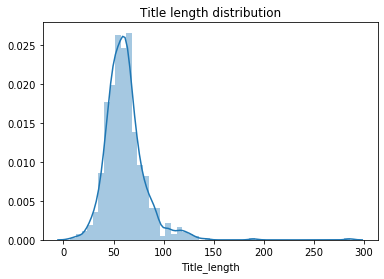

In [43]:
sns.distplot(df['Title_length']).set_title('Title length distribution')

No título e sumário juntos

In [8]:
uploaded = files.upload()

Saving df_news.csv to df_news.csv


In [0]:
df2 = pd.read_csv(io.BytesIO(uploaded['df_news.csv']))

In [0]:
df2['News_length'] = df2['news'].str.len()

Text(0.5, 1.0, 'News length distribution')

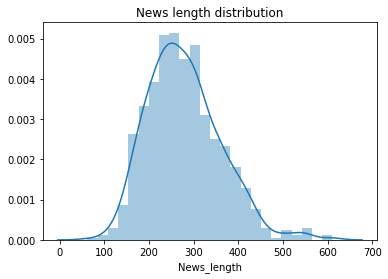

In [14]:
sns.distplot(df2['News_length']).set_title('News length distribution')

### Número de palavras por notícia

In [0]:
dfword = pd.read_csv(io.BytesIO(uploaded['df_news2.csv']))

In [0]:
dfword["news_words"] = dfword['news'].str.split().str.len()

Antes de remover as stop words

Text(0.5, 1.0, 'News words count distribution')

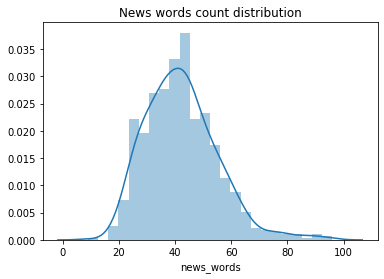

In [51]:
sns.distplot(dfword['news_words']).set_title('News words count distribution')

In [52]:
dfword['news_words'].describe()

count    748.000000
mean      42.219251
std       12.842994
min        9.000000
25%       33.000000
50%       41.000000
75%       50.000000
max       96.000000
Name: news_words, dtype: float64

Depois de remover as stop words

Text(0.5, 1.0, 'News words count distribution after removing stop words')

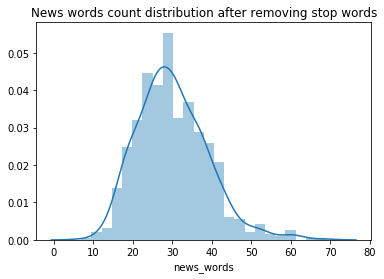

In [53]:
df4["news_words"] = df4['news'].str.split().str.len()
sns.distplot(df4['news_words']).set_title('News words count distribution after removing stop words')

In [54]:
df4['news_words'].describe()

count    748.000000
mean      30.081551
std        8.882848
min        7.000000
25%       24.000000
50%       29.000000
75%       36.000000
max       69.000000
Name: news_words, dtype: float64

## "Business_line" por "topic"

In [55]:
temp4 = df.groupby(['business_line', 'topic']).size()
temp4.head(40)

business_line  topic                          
Agriculture    VTOL                                1
Commercial     Aircraft sales                     12
               Airworthiness Directive             2
               Contract                           11
               Cybersecurity                       1
               Deal                               37
               Events                              2
               Expansion                           8
               Financial                           7
               Fueling                             1
               Geopolitc enviroment                1
               Geopolitc environment              10
               Investment                          5
               Legislation                         4
               M&A                                 4
               Market                             16
               New Aircraft                        1
               New aircraft                       17

## Top Words

### Word Clouds

In [0]:
df_news3 = pd.read_csv(io.BytesIO(uploaded['df_news3.csv']))

In [12]:
aggregation_functions = {'news': 'sum', 'topic': 'first'}
countwords = df_news3.groupby(df_news3["topic"]).aggregate(aggregation_functions)
countwords.head(10)

,news,topic
topic,,
-,cirrus aircraft introduce autonomous land syst...,-
Aircraft sales,airbus sell 41 jet september target record fo...,Aircraft sales
Commercial,dgca step ahead push overhaul a320 neo air...,Commercial
Contract,unite technologies net $3252m contract f-35 d...,Contract
Deal,mros face deadline sign airbus' royalty fee p...,Deal
Executive,avfuel supply saf bizjets travel nbaa-bace ...,Executive
Expansion,jet aviation announce open new teterboro hang...,Expansion
Gov. Contract.,boeing f-18 jet may leg germany eurofight...,Gov. Contract.
M&A,primeflight aviation service acquire global av...,M&A


In [18]:
countwords.shape

(18, 2)

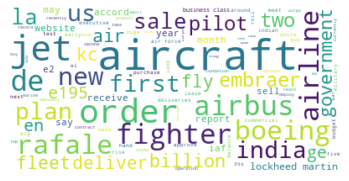

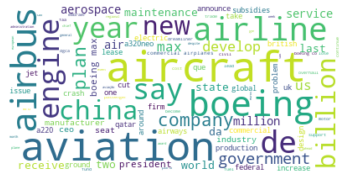

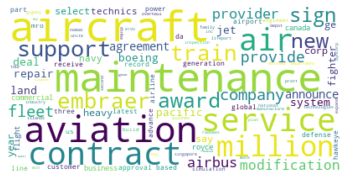

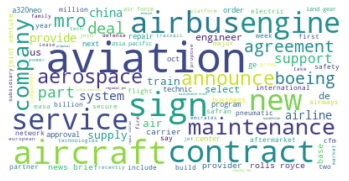

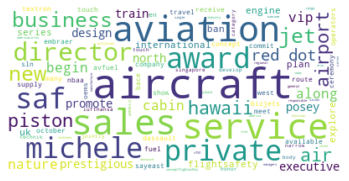

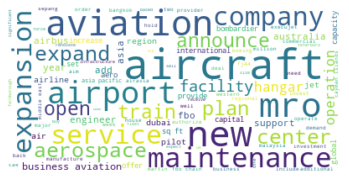

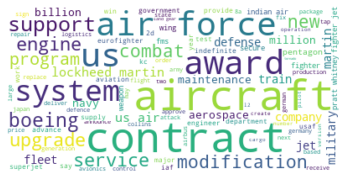

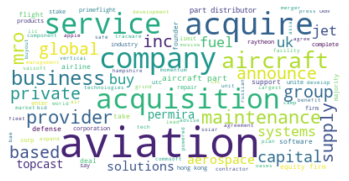

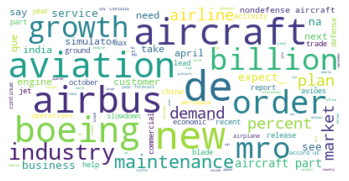

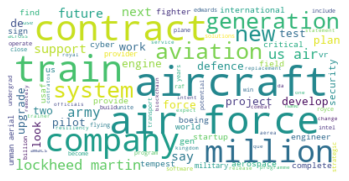

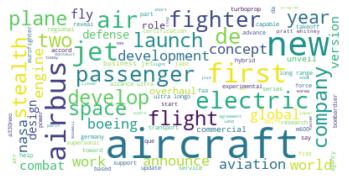

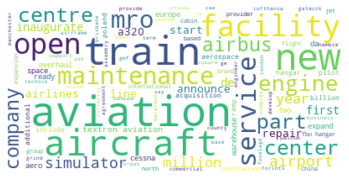

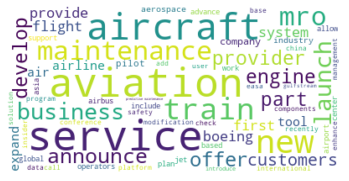

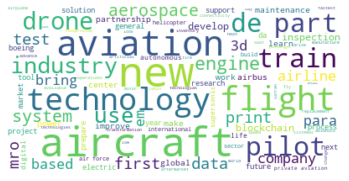

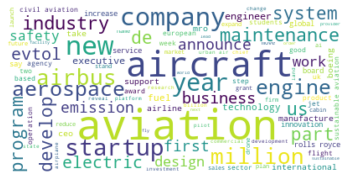

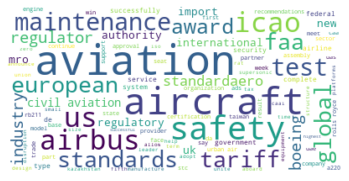

In [19]:
from wordcloud import WordCloud
wc = WordCloud(background_color="white", colormap="Dark2", max_font_size=150, random_state=42)
import matplotlib.pyplot as plt

for c in range(1,17):
  wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(countwords['news'].iloc[c])
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

In [116]:
plt.rcParams['figure.figsize'] = [16, 6]

topic_names = ["Deal",
    "Self-awareness",
    "New service",
    "New technology",
    "New aircraft",
    "Gov. Contract.",
    "Expansion",
    "Market",
    "Regulation",
    "New facility",
    "Aircraft sales",
    "Contract",
    "M&A",
    "Commercial",
    "Other",
    "Executive",
    "Military"]

# Create subplots for each comedian
for index, topico in enumerate(df3.topic):
    wc.generate(data_clean.transcript[topico])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(topic_names[index])
    
plt.show()

NameError: ignored

# Data Cleaning

Vamos modificar nosso dataframe e criar outros "csv files" que serão úteis para montarmos nossos modelos.

### Excluir coluna source.1

In [6]:
df_no_source = df.drop(columns="source.1")
df_no_source.head(5)

,title,summary,source,topic,business_line
0,Embraer's E190-E2 Program Development Named 20...,"Project Management Institute (PMI), the world’...",Business Wire,Self-awareness,Commercial
1,Jet Aviation Announces Opening of New Teterbor...,Jet Aviation announces the opening of its new ...,AviationPros.com,Expansion,Executive
2,GMF Solidifies Its Airframe Capabilities With ...,"GMF AeroAsia is adding hangars, subsidiaries a...",MRO Network,New facility,Commercial
3,United Technologies nets $325.2M contract for ...,The Pratt & Whitney division of United Technol...,Breitbart,Contract,Military
4,"Boeing wants to double in size, and Australia ...",American aircraft manufacturer Boeing expects ...,The Australian Financial Review,Expansion,Commercial


In [0]:
df_no_source.to_csv('df_no_source.csv')
files.download('df_no_source.csv')

### Juntar as colunas "title" e "summary"

In [7]:
df_no_source['news'] = df_no_source['title'] +' '+ df_no_source['summary']
df_news = df_no_source.drop(["title", "summary"], axis=1)
df_news = df_news[['news', 'source', 'topic', 'business_line']]
df_news.head(5)

,news,source,topic,business_line
0,Embraer's E190-E2 Program Development Named 20...,Business Wire,Self-awareness,Commercial
1,Jet Aviation Announces Opening of New Teterbor...,AviationPros.com,Expansion,Executive
2,GMF Solidifies Its Airframe Capabilities With ...,MRO Network,New facility,Commercial
3,United Technologies nets $325.2M contract for ...,Breitbart,Contract,Military
4,"Boeing wants to double in size, and Australia ...",The Australian Financial Review,Expansion,Commercial


In [0]:
df_news.to_csv('df_news.csv')
files.download('df_news.csv')

### Juntar as colunas "topic" e "business line"

### Data Cleaning
Make text all lower case

Remove punctuation

Remove numerical values

Remove common non-sensical text (/n)

Tokenize text

Remove stop words

Deixar o texto todo em letra minúscula

Queremos que o modelo "saiba" que, por exemplo, "Casa" e "casa" são a mesma palavra

In [0]:
df2['news'] = df2['news'].str.lower()

In [11]:
df2.head(5)

,Unnamed: 0,news,source,topic,business_line
0,0,embraer's e190-e2 program development named 20...,Business Wire,Self-awareness,Commercial
1,1,jet aviation announces opening of new teterbor...,AviationPros.com,Expansion,Executive
2,2,gmf solidifies its airframe capabilities with ...,MRO Network,New facility,Commercial
3,3,united technologies nets $325.2m contract for ...,Breitbart,Contract,Military
4,4,"boeing wants to double in size, and australia ...",The Australian Financial Review,Expansion,Commercial


Remover símbolos de pontuação

Pontuações não tem nenhum poder de predição por isso é melhor removelas do texto

In [0]:
punctuation_signs = list("?:!.,;")
for p in punctuation_signs:
    df2['news'] = df2['news'].str.replace(p, '')

In [13]:
df2.head(5)

,Unnamed: 0,news,source,topic,business_line
0,0,embraer's e190-e2 program development named 20...,Business Wire,Self-awareness,Commercial
1,1,jet aviation announces opening of new teterbor...,AviationPros.com,Expansion,Executive
2,2,gmf solidifies its airframe capabilities with ...,MRO Network,New facility,Commercial
3,3,united technologies nets $3252m contract for f...,Breitbart,Contract,Military
4,4,boeing wants to double in size and australia i...,The Australian Financial Review,Expansion,Commercial


Remover terminações de pronomes possesivos

Modelo agora deve interpretar Embraer´s e Embraer se referindo à mesma palavra

In [0]:
df2['news'] = df2['news'].str.replace("'s", "")

In [15]:
df2.head(5)

,Unnamed: 0,news,source,topic,business_line
0,0,embraer e190-e2 program development named 2019...,Business Wire,Self-awareness,Commercial
1,1,jet aviation announces opening of new teterbor...,AviationPros.com,Expansion,Executive
2,2,gmf solidifies its airframe capabilities with ...,MRO Network,New facility,Commercial
3,3,united technologies nets $3252m contract for f...,Breitbart,Contract,Military
4,4,boeing wants to double in size and australia i...,The Australian Financial Review,Expansion,Commercial


Limpar caracteres especiais

In [0]:
df2['news'] = df2['news'].str.replace("\r", " ")
df2['news'] = df2['news'].str.replace("\n", " ")
df2['news'] = df2['news'].str.replace("    ", " ")
df2['news'] = df2['news'].str.replace('"', '')

In [17]:
df2.head(5)

,Unnamed: 0,news,source,topic,business_line
0,0,embraer e190-e2 program development named 2019...,Business Wire,Self-awareness,Commercial
1,1,jet aviation announces opening of new teterbor...,AviationPros.com,Expansion,Executive
2,2,gmf solidifies its airframe capabilities with ...,MRO Network,New facility,Commercial
3,3,united technologies nets $3252m contract for f...,Breitbart,Contract,Military
4,4,boeing wants to double in size and australia i...,The Australian Financial Review,Expansion,Commercial


In [0]:
df_news2 = df2
df_news2.to_csv('df_news2.csv')
files.download('df_news2.csv')


.

In [30]:
uploaded = files.upload()

Saving df_news2.csv to df_news2 (1).csv


In [0]:
df3 = pd.read_csv(io.BytesIO(uploaded['df_news2.csv']))

.

Remover stop words

In [15]:
# Downloading punkt and wordnet from NLTK
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
stop_words = list(stopwords.words('english'))

In [17]:
stop_words[0:20]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

In [0]:
for stop_word in stop_words:

    regex_stopword = r"\b" + stop_word + r"\b"
    df3['news'] = df3['news'].str.replace(regex_stopword, '')

In [40]:
df3.head(5)

,Unnamed: 0,Unnamed: 0.1,news,source,topic,business_line
0,0,0,embraer e190-e2 program development named 2019...,Business Wire,Self-awareness,Commercial
1,1,1,jet aviation announces opening new teterboro ...,AviationPros.com,Expansion,Executive
2,2,2,gmf solidifies airframe capabilities new str...,MRO Network,New facility,Commercial
3,3,3,united technologies nets $3252m contract f-35...,Breitbart,Contract,Military
4,4,4,boeing wants double size australia central...,The Australian Financial Review,Expansion,Commercial


In [0]:
df4 = df3

Word Lemmatization

In [0]:
wordnet_lemmatizer = WordNetLemmatizer()
nrows = len(df3)
lemmatized_text_list = []

for row in range(0, nrows):
    
    # Create an empty list containing lemmatized words
    lemmatized_list = []
    
    # Save the text and its words into an object
    text = df3.loc[row]['news']
    text_words = text.split(" ")

    # Iterate through every word to lemmatize
    for word in text_words:
        lemmatized_list.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
        
    # Join the list
    lemmatized_text = " ".join(lemmatized_list)
    
    # Append to the list containing the texts
    lemmatized_text_list.append(lemmatized_text)
    
df3['news'] = lemmatized_text_list

In [43]:
df3.head(10)

,Unnamed: 0,Unnamed: 0.1,news,source,topic,business_line
0,0,0,embraer e190-e2 program development name 2019 ...,Business Wire,Self-awareness,Commercial
1,1,1,jet aviation announce open new teterboro hang...,AviationPros.com,Expansion,Executive
2,2,2,gmf solidify airframe capabilities new strat...,MRO Network,New facility,Commercial
3,3,3,unite technologies net $3252m contract f-35 d...,Breitbart,Contract,Military
4,4,4,boeing want double size australia central ...,The Australian Financial Review,Expansion,Commercial
5,5,5,airbus invest $5 billion turkey 2030 turkis...,Aeronautics Online,Investment,Generic
6,6,6,airbus sell 41 jet september target record fo...,Reuters,Aircraft sales,Commercial
7,7,7,aar test drone aircraft inspection miami aar...,MRO Network,New technology,Generic
8,8,8,airbus plan venture help airlines hedge reve...,Bloomberg,New service,Commercial
9,9,9,airx world largest lineage operator airx u...,Corporate Jet Investor,Self-awareness,Commercial


In [0]:
df3.to_csv('df_lemma.csv')
files.download('df_lemma.csv')

#Label coding

In [0]:
df3 = pd.read_csv(io.BytesIO(uploaded['df_lemma.csv']))

In [0]:
category_codes = {
    "Deal": 0,
    "Self-awareness": 1,
    "New service": 2,
    "New technology": 3,
    "New aircraft": 4,
    "Gov. Contract.": 5,
    "Expansion": 6,
    "Market": 7,
    "Regulation": 8,
    "New facility": 9,
    "Aircraft sales": 10,
    "Contract": 11,
    "M&A": 12,
    "Commercial": 13,
    "Other": 14,
    "Executive": 15,
    "Military": 16,
}

In [0]:
df3['topic_code'] = df3['topic']
df3 = df3.replace({'topic_code':category_codes})

# Train - test split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df3['news'], df3['topic_code'], test_size=0.15, random_state=27)

In [0]:
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 500

In [25]:
tfidf = TfidfVectorizer(encoding='utf-8', ngram_range=ngram_range, stop_words=None, lowercase=False, max_df=max_df, min_df=min_df, max_features=max_features, norm='l2', sublinear_tf=True)
                        
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train.shape)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)

(635, 316)
(113, 316)


#See what unigrams and bigrams are most correlated with each category

In [106]:
from sklearn.feature_selection import chi2

for Product, topic_id in sorted(category_codes.items()):
    features_chi2 = chi2(features_train, labels_train == topic_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}' topic:".format(Product))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-5:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-2:])))
    print("")

# 'Aircraft sales' topic:
  . Most correlated unigrams:
. deliver
. five
. order
. india
. sell
  . Most correlated bigrams:
. lockheed martin
. fighter jet

# 'Commercial' topic:
  . Most correlated unigrams:
. china
. trade
. last
. 737
. max
  . Most correlated bigrams:
. boeing 737
. 737 max

# 'Contract' topic:
  . Most correlated unigrams:
. award
. contract
. select
. navy
. modification
  . Most correlated bigrams:
. aircraft maintenance
. million contract

# 'Deal' topic:
  . Most correlated unigrams:
. contract
. deal
. agreement
. news
. sign
  . Most correlated bigrams:
. asia pacific
. rolls royce

# 'Executive' topic:
  . Most correlated unigrams:
. division
. begin
. series
. sales
. private
  . Most correlated bigrams:
. business aviation
. business jet

# 'Expansion' topic:
  . Most correlated unigrams:
. bombardier
. asia
. expand
. hangar
. expansion
  . Most correlated bigrams:
. asia pacific
. business aviation

# 'Gov. Contract.' topic:
  . Most correlated unigram

## Save the files we'll need

In [0]:
df3.to_csv('df_news3.csv')
files.download('df_news3.csv')

In [26]:

# X_train
with open('Pickles/X_train.pickle', 'wb') as output:
    pickle.dump(X_train, output)
    
# X_test    
with open('Pickles/X_test.pickle', 'wb') as output:
    pickle.dump(X_test, output)
    
# y_train
with open('Pickles/y_train.pickle', 'wb') as output:
    pickle.dump(y_train, output)
    
# y_test
with open('Pickles/y_test.pickle', 'wb') as output:
    pickle.dump(y_test, output)
    
# df
with open('Pickles/df.pickle', 'wb') as output:
    pickle.dump(df3, output)
    
# features_train
with open('Pickles/features_train.pickle', 'wb') as output:
    pickle.dump(features_train, output)

# labels_train
with open('Pickles/labels_train.pickle', 'wb') as output:
    pickle.dump(labels_train, output)

# features_test
with open('Pickles/features_test.pickle', 'wb') as output:
    pickle.dump(features_test, output)

# labels_test
with open('Pickles/labels_test.pickle', 'wb') as output:
    pickle.dump(labels_test, output)
    
# TF-IDF object
with open('Pickles/tfidf.pickle', 'wb') as output:
    pickle.dump(tfidf, output)

FileNotFoundError: ignored